In [1]:
%matplotlib inline

In [2]:

import cv2 
import matplotlib.pyplot as plt


In [3]:
def locate_nodes(path_to_image):
#read 3D rbg image as 2D greyscale nparray
    print("be sure you are pathing to a skeleton for locate_nodes")
    blobs = cv2.imread(cv2.samples.findFile(path_to_image),0) 
    # last parameter 0 = greyscale 1 = color -1 = unchanged 

    #convert data from int to np bool 
    blobs = blobs > 127
    # plt.imshow(blobs)
    #blobs is now a (540,960) 2 D array

    print("(ydim , xdim) == ",blobs.shape)

    ydim = blobs.shape[0] #num rows 540
    xdim = blobs.shape[1] #num columns 960


    # measure some skeleton metrics down here 
    sum_local_neighbors = 0 #number of adjacent skeleton pixels 
    sum_num_nodes = 0 #total number pixels that are of nodes of the skeleton
    sum_num_edges = 0 #total number pixels that are of edges ots 
    sum_num_endpoints = 0 #total number of pixels that are end points of the skeleton
    sum_num_islands = 0 #total number of pixels that are isolated
    sum_points_length = 0 #total number of skeleton pixels aka length of skeleton

    total_num_edgelines = 0 #how many actual edges are there in the network

    #lets make a bunch of arrays storing : node locations, endpoint locations, edge locations,island locations  
    node_locations = []
    edge_locations = []
    endpoint_locations = []
    island_locations = []

    total_skeleton = []
    #here we are going to find the nodes and edges and endpoints

    for row in range(0,ydim): #iterate through rows 
        for col in range(0,xdim): #iterate through columns
            
            if blobs[row][col] == True: #if pixel is skeleton add 1 to length of skeleton
                sum_points_length +=1
                
                #find the sum of the local neighbors included in the skeleton (including self): 1 = solo ,2= endpoint, 3 = edge , 4+ = node 
                for i in range(0,3):
                    for j in range(0,3):
                        try: #this because there may be points on the edge of the picture
                            sum_local_neighbors += int(blobs[row + i - 1 ][col + j - 1 ])
                        except:
                            pass
                
                #HEY JUST SO YOU KNOW: here I switch formats from (y,x) to (x,y) just to make things more confusing 
                 
                #figure out num nodes endpoints and edges
                if sum_local_neighbors == 4: #if node
                    node_locations.append([col,row])
                    sum_num_nodes += 1
                    total_num_edgelines += sum_local_neighbors -1 #count connection points (-1 to remove self counting)
                elif sum_local_neighbors == 3: # if edge
                    edge_locations.append([col,row])
                    sum_num_edges += 1
                elif sum_local_neighbors == 2: # if endpoint
                    endpoint_locations.append([col,row])
                    sum_num_endpoints += 1
                    total_num_edgelines += sum_local_neighbors -1 #count connection points (-1 to remove self counting)
                else: #if island 
                    island_locations.append([col,row])
                    print("isolated point at (x,y)", col, row)
                    sum_num_islands +=1
                total_skeleton.append([col,row])
                #reset counter     
                sum_local_neighbors = 0

    #error check
    if sum_num_nodes + sum_num_edges + sum_num_endpoints + sum_num_islands == sum_points_length & len(total_skeleton) == sum_points_length:
        print("No errors detected")
    else:
        print("f*&!")

    total_num_edgelines = total_num_edgelines / 2 #because each edge has two endpoints 
    print("this skeleton has {0} edge lines, {1} nodes, {2} endpoints, and {3} islands. \nthe skeleton is of length {4} pixels.".format(total_num_edgelines , sum_num_nodes, sum_num_endpoints, sum_num_islands, sum_points_length))

    print("the edgelines are of average length {0}, .".format( sum_num_edges / total_num_edgelines))

    print("this function returns total_skeleton, nodes, edges, endpoints, and island's locations in (x,y) coordinate form")
    return total_skeleton,node_locations,edge_locations,endpoint_locations,island_locations

In [4]:
def open_image(path):
    try: 
        image = cv2.imread(path, 0) # Reading an image in grayscale mode
        print("found image at : " , path)
    except:
        print("couldn't find image at : ", path)
    return(image)

def show_image(image):
    plt.imshow(image, cmap='gray') #map the image to black and white, white representing the line 
    plt.show()
    print("Plotted")

In [5]:
path = r'../MAPS/Lake_Murray_Map_Skeletons/e_d_murray_skeleton.png' 
total_skeleton,node_locations,edge_locations,endpoint_locations,island_locations = locate_nodes(path)

path = r'e_d_murray_skeleton.png'
image = open_image(path)

print(endpoint_locations[0])

be sure you are pathing to a skeleton for locate_nodes
(ydim , xdim) ==  (403, 341)
isolated point at (x,y) 225 51
isolated point at (x,y) 80 156
isolated point at (x,y) 194 170
isolated point at (x,y) 103 233
isolated point at (x,y) 183 245
isolated point at (x,y) 209 309
isolated point at (x,y) 143 314
isolated point at (x,y) 146 334
isolated point at (x,y) 255 335
No errors detected
this skeleton has 108.0 edge lines, 63 nodes, 27 endpoints, and 9 islands. 
the skeleton is of length 1809 pixels.
the edgelines are of average length 15.833333333333334, .
this function returns total_skeleton, nodes, edges, endpoints, and island's locations in (x,y) coordinate form
found image at :  e_d_murray_skeleton.png
[78, 6]


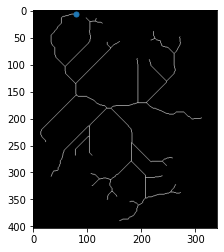

In [6]:
# draw image
plt.imshow(image, cmap='gray')
plt.plot(endpoint_locations[0][0],endpoint_locations[0][1], marker = '.' , markersize=10) #------------------------ for future jason : 

######### hey so you need to figure out what is wrong with locate nodes
#then finish the trimming
#therefore : compare to the endpoints of each edge, see if you can identify which ones are nodes and which one are endpoints which can be trimmed  



#  --------------------------------------------------------------------------------------------
# print(type(island_locations[0,0]))

[78, 6]
<class 'list'>
[98, 14]
<class 'list'>
[117, 15]
<class 'list'>
[128, 24]
<class 'list'>
[223, 39]
<class 'list'>
[272, 49]
<class 'list'>
[218, 55]
<class 'list'>
[160, 58]
<class 'list'>
[137, 59]
<class 'list'>
[193, 89]
<class 'list'>
[215, 91]
<class 'list'>
[312, 199]
<class 'list'>
[23, 243]
<class 'list'>
[78, 268]
<class 'list'>
[109, 268]
<class 'list'>
[258, 273]
<class 'list'>
[247, 287]
<class 'list'>
[107, 302]
<class 'list'>
[239, 306]
<class 'list'>
[33, 307]
<class 'list'>
[264, 322]
<class 'list'>
[109, 324]
<class 'list'>
[273, 337]
<class 'list'>
[155, 344]
<class 'list'>
[137, 350]
<class 'list'>
[179, 354]
<class 'list'>
[160, 389]
<class 'list'>


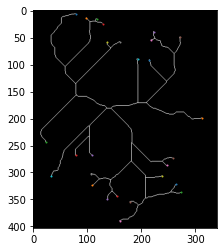

In [7]:
for i in range(0,len(endpoint_locations)):
    # draw image
    print(endpoint_locations[i])
    print(type(endpoint_locations[i]))
    plt.imshow(image, cmap='gray')
    plt.plot(endpoint_locations[i][0],endpoint_locations[i][1], marker = '.' , markersize=2) #------------------------ for future jason : 

    ######### hey so you need to figure out what is wrong with locate nodes
    #then finish the trimming
    #therefore : compare to the endpoints of each edge, see if you can identify which ones are nodes and which one are endpoints which can be trimmed  



    #  --------------------------------------------------------------------------------------------
    # print(type(island_locations[0,0]))

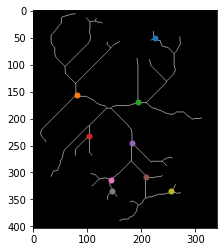

In [13]:

for i in range(0,len(island_locations)):
    # draw image
    plt.imshow(image, cmap='gray')
    plt.plot(island_locations[i][0],island_locations[i][1], marker = '.' , markersize=10) #------------------------ for future jason : 

    ######### hey so you need to figure out what is wrong with locate nodes
    #then finish the trimming
    #therefore : compare to the endpoints of each edge, see if you can identify which ones are nodes and which one are endpoints which can be trimmed  



    #  --------------------------------------------------------------------------------------------
    # print(type(island_locations[0,0]))

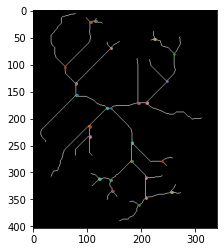

In [15]:

for i in range(0,len(node_locations)):
    # draw image
    plt.imshow(image, cmap='gray')
    plt.plot(node_locations[i][0],node_locations[i][1], marker = '.' , markersize=3) #------------------------ for future jason : 

    ######### hey so you need to figure out what is wrong with locate nodes
    #then finish the trimming
    #therefore : compare to the endpoints of each edge, see if you can identify which ones are nodes and which one are endpoints which can be trimmed  



    #  --------------------------------------------------------------------------------------------
    # print(type(island_locations[0,0]))